## simulate the theory angular power spectrum

****************************************************************************************************
number of maps: 1
****************************************************************************************************


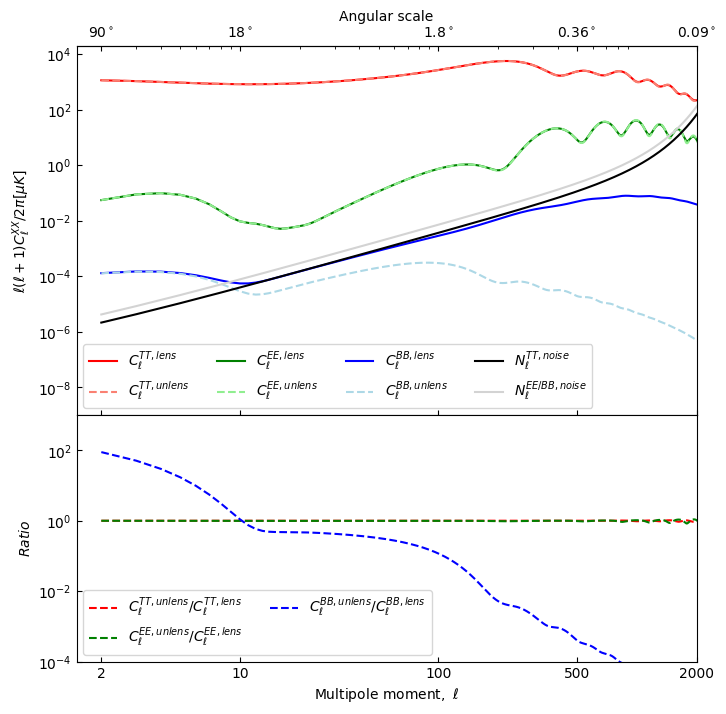

In [1]:
import os
import pylab as pl
import numpy as np
import healpy as hp
from lenspyx.utils import camb_clfile
import matplotlib.pyplot as plt
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

def sensity(ls, net):
    return net*net/np.exp(-1*ls*(ls+1)*theta*theta/8/np.log(2))


def sensity_value(ls, net, fsky, ndet, Y, deltaT, theta):
    return ((net*np.sqrt(4*np.pi*fsky))/(np.sqrt(ndet*Y*deltaT)))

i = 0
ws = [-1.025, -1, -0.975][0:1]
rs = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01][0:1]
linears = [2]
splt = int(len(ws)*len(rs)*len(linears))
lenmaps = []; unlenmaps = []; lenmap_arrs = []; unlenmap_arrs = []
nside = 2048; cls_path = './sim_data/camb/cls/'
print(100*"*")
print("number of maps: %d"%splt)
print(100*"*")

path = '/home/nisl/Data/CMB_DeLensing/fits/'

lmax_len = 4000 # desired lmax of the lensed field.
dlmax = 1024  # lmax of the unlensed fields is lmax + dlmax.  (some buffer is required for accurate lensing at lmax)
epsilon = 1e-6 # target accuracy of the output maps (execution time has a fairly weak dependence on this)
lmax_unl, mmax_unl = lmax_len + dlmax, lmax_len + dlmax
lmax_len, mmax_len = lmax_unl,  mmax_unl
w = -1; r = 0.005
lensCL = camb_clfile(os.path.join(cls_path, 'Lens_w_%0.3f_r_%0.3f_lensedCls.dat'%(w, r)))
unlensCL = camb_clfile(os.path.join(cls_path, 'Lens_w_%0.3f_r_%0.3f_lenspotentialCls.dat'%(w, r)))

field0 = 'TT'
field='EE'
field1='BB'

ls = np.arange(2, nside)
factor = ls*(ls+1)/2/np.pi
net = 2.1; fsky = 0.8; ndet = 1020; Y = 1; deltaT = 24*3600;
theta = 7.9/60*np.pi/180

net = sensity_value(ls, net, fsky, ndet, Y, deltaT, theta)

noise_T = sensity(ls, 1.5/1e3)
noise_P = sensity(ls, 2.1/1e3)

#print(noise_E[-10:])
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 1, hspace=0, wspace=0, width_ratios=[1], height_ratios=[1.5, 1])
ax1, ax2 = gs.subplots(sharex='col', sharey='row')
# ax1.plot(ls, factor*lensCL['tt'][ls], label = r"$C_\ell^{%s, lens}$"%field, c='blue')
# ax1.plot(ls, factor*unlensCL['tt'][ls], label = r"$C_\ell^{%s, unlens}$"%field, c='orange')
# ax1.plot(ls, noise, label = r"$Noise$", c='orange')
ax1.loglog(ls, factor*lensCL['%s'%field0.lower()][ls], label = r"$C_\ell^{%s, lens}$"%field0, c='red')
ax1.loglog(ls, factor*unlensCL['%s'%field0.lower()][ls], label = r"$C_\ell^{%s, unlens}$"%field0, c='salmon', linestyle='--')


ax1.loglog(ls, factor*lensCL['%s'%field.lower()][ls], label = r"$C_\ell^{%s, lens}$"%field, c='green')
ax1.loglog(ls, factor*unlensCL['%s'%field.lower()][ls], label = r"$C_\ell^{%s, unlens}$"%field, c='lightgreen', linestyle='--')


ax1.loglog(ls, factor*(lensCL['%s'%field1.lower()][ls] + unlensCL['%s'%field1.lower()][ls]), label = r"$C_\ell^{%s, lens}$"%field1, c='blue')
ax1.loglog(ls, factor*unlensCL['%s'%field1.lower()][ls], label = r"$C_\ell^{%s, unlens}$"%field1, c='lightblue', linestyle='--')

ax1.loglog(ls, factor*noise_T, label = r"$N_\ell^{TT, noise}$", c='black')#, linestyle='-')
ax1.loglog(ls, factor*noise_P, label = r"$N_\ell^{EE/BB, noise}$", c='lightgrey')#, linestyle='--')

ax1.set_xlim(1.5, 2000)
ax1.set_xticks([2, 10, 100, 500, 2000])
ax1.set_xticklabels(['2', '10', '100', '500', '2000'])
ax1.set_ylim(1e-9, 2e4)
ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2,  1e0, 1e2, 1e4])
ax1.set_yticklabels([r'$10^{-8}$', r'$10^{-6}$', r'$10^{-4}$',  r'$10^{-2}$', r'$10^{0}$', r'$10^2$', r'$10^4$'])
ax1.set_ylabel(r"$\ell(\ell+1)C^{XX}_\ell/2\pi[\mu K]$")
ax1.legend(loc='best', ncol=4)


ax_top = ax1.twiny()
ax_top.spines.top.set_position(("axes", 1))  # 调整上部axis的位置
ax_top.set_xscale("log")
ax_top.set_xlim(1.5, 2000)
ax_top.set_xticks([2, 10, 100, 500, 2000])
ax_top.set_xticklabels([r'$90^\circ$', r'$18^\circ$', r'$1.8^\circ$', r'$0.36^\circ$', r'$0.09^\circ$'])
ax_top.set_xlabel("Angular scale")
ax_top.spines['left'].set_visible(False)
ax_top.spines['bottom'].set_visible(False)
ax_top.spines['right'].set_visible(False)

ax2.loglog(ls, unlensCL['%s'%field0.lower()][ls]/lensCL['%s'%field0.lower()][ls], label = r"$C_\ell^{%s, unlens}/C_\ell^{%s, lens}$"%(field0, field0), color='red', linestyle='--')
ax2.loglog(ls, unlensCL['%s'%field.lower()][ls]/lensCL['%s'%field.lower()][ls], label = r"$C_\ell^{%s, unlens}/C_\ell^{%s, lens}$"%(field, field), color='green', linestyle='--')
ax2.loglog(ls, unlensCL['%s'%field1.lower()][ls]/lensCL['%s'%field1.lower()][ls], label = r"$C_\ell^{%s, unlens}/C_\ell^{%s, lens}$"%(field1, field1), color='blue', linestyle='--')
#ax2.loglog(ls, ls/ls, color='gray', label=r'$Ratio=1$')

ax2.minorticks_off()
ax2.set_xlabel(r"$\rm{Multipole~moment,}~\ell$")
ax2.set_ylabel(r"$Ratio$")
ax2.set_ylim(1e-4, 1e3)
ax2.set_yticks([1e-4, 1e-2, 1e0, 1e2])
ax2.set_yticklabels([r'$10^{-4}$', r'$10^{-2}$',  r'$10^{0}$', r'$10^{2}$'])
ax2.set_xlim(1.5, 2000)
ax2.set_xticks([2, 10, 100, 500, 2000])
ax2.set_xticklabels(['2', '10', '100', '500', '2000'])
ax2.set_ylabel(r"$Ratio$")
ax2.legend(ncol=2, loc='lower left')


for ax in fig.get_axes():
    ax.label_outer()
plt.savefig("figures/TT_EE_BB_cl_ratio.pdf", bbox_inches='tight', pad_inches=0, dpi=300, format='pdf')
plt.show()

## I/Q/U patch show

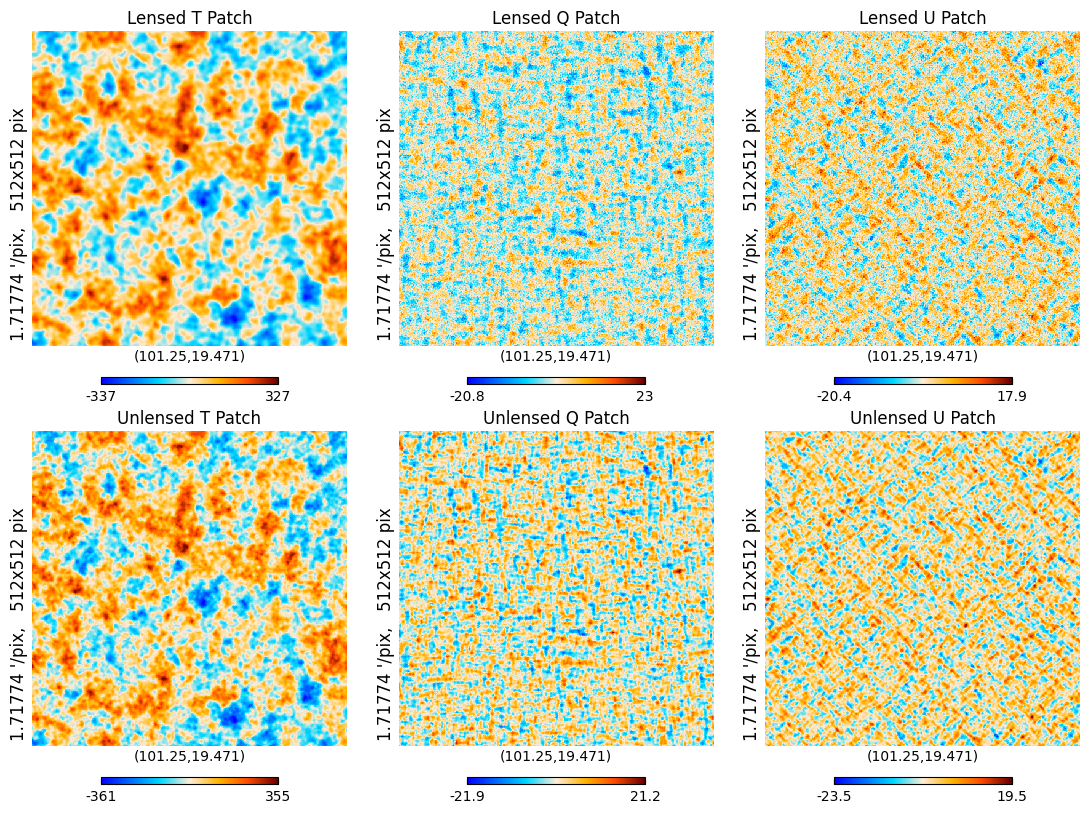

In [2]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

import pspy, pixell, os, sys
from pspy.so_config import DEFAULT_DATA_DIR
pixell.colorize.mpl_setdefault("planck")

def sensity(ls, net, theta):
    return net*net/np.exp(-1*ls*(ls+1)*theta*theta/8/np.log(2))


def get_noise(cl_tt_noise, cl_ee_noise, cl_bb_noise):
    nside = 2048
    ell_max = 2*nside - 1
    cl_noises = [cl_tt_noise, cl_ee_noise, cl_bb_noise,
                 np.zeros_like(cl_tt_noise),
                 np.zeros_like(cl_tt_noise),
                 np.zeros_like(cl_tt_noise)]
    alm_noise = hp.synalm(cl_noises, lmax=ell_max, new=True)

    n_T, n_Q, n_U = hp.alm2map(alm_noise, nside=nside, lmax=ell_max, pol=True)


    return n_T, n_Q, n_U


nside = 2048
ell_max = 3*nside - 1
ells = np.arange(ell_max + 1)
theta = 7.9/60*np.pi/180
noise_T = sensity(ells, 1.5/1e3, theta)
noise_E = sensity(ells, 2.1/1e3, theta)
noise_B = sensity(ells, 2.1/1e3, theta)
n_T, n_Q, n_U = get_noise(noise_T, noise_E, noise_B)



nside_low = 4
nside_high = 2048
target_pixel = 60

ra_center, dec_center = hp.pix2ang(nside_low, target_pixel, lonlat=True)

Tlen_map = hp.smoothing(hp.read_map("sim_data/map_data/Tlen_w_-1.000_r_0.005.fits") + n_T, fwhm=theta)
Tunl_map = hp.read_map("sim_data/map_data/Tunl_w_-1.000_r_0.005.fits")

Qlen_map = hp.smoothing(hp.read_map("sim_data/map_data/Qlen_w_-1.000_r_0.005.fits") + n_Q, fwhm=theta)
Qunl_map = hp.read_map("sim_data/map_data/Qunl_w_-1.000_r_0.005.fits")

Ulen_map = hp.smoothing(hp.read_map("sim_data/map_data/Ulen_w_-1.000_r_0.005.fits") + n_U, fwhm=theta)
Uunl_map = hp.read_map("sim_data/map_data/Uunl_w_-1.000_r_0.005.fits")



titles = ['Lensed T Patch', 'Lensed Q Patch', 'Lensed U Patch', 'Unlensed T Patch', 'Unlensed Q Patch', 'Unlensed U Patch']

datas = [Tlen_map, Qlen_map, Ulen_map, Tunl_map, Qunl_map, Uunl_map]

plt.figure(figsize=(11, 8)) # Adjust figsize to your needs
for i in range(1, 7):
    ax = plt.subplot(2, 3, i)
    hp.gnomview(
    datas[i-1],
    rot=(ra_center, dec_center, 0),
    reso=hp.nside2resol(nside_high, arcmin=True),  
    xsize=512,       
    ysize=512,       
    title=titles[i-1],
    notext=False,
    cbar=True,
    return_projected_map=False,
    sub=(2, 3, i))

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
plt.savefig("figures/patch_show.pdf", format='pdf', bbox_inches='tight', pad_inches=0, dpi=70)
plt.show()


## This is a test code. If the data simulation is completed, the data can be updated.

In [1]:
import numpy as np
import tensorflow as tf
from model import unet2d
import os, sys


epochs = 10  # 5000


os.environ['CUDA_VISIBLE_DEVICES'] = '0' #  '0, 1, 2, 3, 4, 5, 6, 7'


def run_norm(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))

def rmse(y_true, y_pred):
    y_true_float = tf.image.convert_image_dtype(y_true, tf.float32)
    y_pred_float = tf.image.convert_image_dtype(y_pred, tf.float32)
    loss = tf.sqrt(tf.reduce_mean(tf.square(y_true_float - y_pred_float)) + 0.001*0.001) - 0.001
    return loss

boundaries = [750, 2000]
values = [1e-3, 1e-4, 1e-5]
lr = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
lr = 1e-3


field = "T"
theta = 0; phi = 0
x = np.load("sim_data/rot_map_data/%slens_rot_theta_%d_phi_%d.npy"%(field, theta, phi)).reshape(-1, 512, 512, 1)
y = np.load("sim_data/rot_map_data/%sunls_rot_theta_%d_phi_%d.npy"%(field, theta, phi)).reshape(-1, 512, 512, 1)


img_w = img_h = 512
batch_size = 32; k_size = 3; dropout_rate = 0.2
TRAIN = 4; VAL = 5; TEST = 5

N_TRAIN = int(TRAIN*192); N_VAL  = int(VAL*192); N_TEST = int(TEST*192)

train_input = x[0:N_TRAIN]; #train_input = gray2rgb(train_input).numpy()
valid_input   = x[N_VAL:N_TEST]; #valid_input = gray2rgb(valid_input).numpy()
test_input  = x[N_TRAIN:N_TEST]#test_input = gray2rgb(test_input).numpy()

train_label = y[0:N_TRAIN]; #train_label = gray2rgb(train_label).numpy()
valid_label   = y[N_VAL:N_TEST];# valid_label = gray2rgb(valid_label).numpy()
test_label  = y[N_TRAIN:N_TEST]; #test_label = gray2rgb(test_label).numpy()

print("train_input, valid_input, test_input shape:", train_input.shape, valid_input.shape, test_input.shape)
print("train_label, valid_label, test_label shape:", train_label.shape, valid_label.shape, test_label.shape)

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    net = unet2d.unet2D(n_filters=32, conv_width=3, network_depth=3, n_channels=1, x_dim=img_h, dropout=0.2, \
                         growth_factor=2, batchnorm=True, momentum=0.9, epsilon=0.001, activation='relu', maxpool=True)
    net = net.build_model()
    net.compile(optimizer=tf.optimizers.Adam(learning_rate = lr, beta_1=0.9, beta_2=0.999), loss='logcosh', metrics=['mae', 'mse'])

history = net.fit(train_input, train_label, epochs=epochs, batch_size=batch_size, validation_data=(valid_input, valid_label))


pred = net.predict(test_input)
np.save('results_TEB/%s_pred_epochs_%d.npy'%(field, epochs), pred)
np.save('results_TEB/%s_test_epochs_%d.npy'%(field, epochs), test_input)
np.save('results_TEB/%s_label_epochs_%d.npy'%(field, epochs), test_label)


2025-05-24 18:44:37.944665: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-24 18:44:38.007511: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


train_input, valid_input, test_input shape: (768, 512, 512, 1) (0, 512, 512, 1) (192, 512, 512, 1)
train_label, valid_label, test_label shape: (768, 512, 512, 1) (0, 512, 512, 1) (192, 512, 512, 1)


2025-05-24 18:44:42.142699: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 41766 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:00:07.0, compute capability: 8.6


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/

2025-05-24 18:44:46.013131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [768,512,512,1]
	 [[{{node Placeholder/_11}}]]
2025-05-24 18:44:46.013446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [768,512,512,1]
	 [[{{node Placeholder/_11}}]]
2025-05-24 18:44:54.235323: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8907
2025-05-24 18:44:54.406201: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-05-24 18:45:01.140665: I ten

24/24 [==============================] - ETA: 0s - loss: 87.0604 - mae: 87.7505 - mse: 12209.3701

2025-05-24 18:45:46.429056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [0,512,512,1]
	 [[{{node Placeholder/_10}}]]
2025-05-24 18:45:46.429356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [0,512,512,1]
	 [[{{node Placeholder/_11}}]]


24/24 [==============================] - 60s 863ms/step - loss: 87.0604 - mae: 87.7505 - mse: 12209.3701
Epoch 2/10
24/24 [==============================] - 21s 863ms/step - loss: 86.0961 - mae: 86.7861 - mse: 12036.3047
Epoch 3/10
24/24 [==============================] - 21s 858ms/step - loss: 85.7067 - mae: 86.3967 - mse: 11941.3281
Epoch 4/10
24/24 [==============================] - 21s 860ms/step - loss: 85.2566 - mae: 85.9466 - mse: 11861.0547
Epoch 5/10
24/24 [==============================] - 21s 862ms/step - loss: 84.8208 - mae: 85.5107 - mse: 11770.1992
Epoch 6/10
24/24 [==============================] - 21s 862ms/step - loss: 84.3473 - mae: 85.0372 - mse: 11671.6611
Epoch 7/10
24/24 [==============================] - 21s 862ms/step - loss: 83.8557 - mae: 84.5455 - mse: 11570.4404
Epoch 8/10
24/24 [==============================] - 21s 862ms/step - loss: 83.3127 - mae: 84.0025 - mse: 11471.2500
Epoch 9/10
24/24 [==============================] - 21s 862ms/step - loss: 82.7679 

2025-05-24 18:48:53.373492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [192,512,512,1]
	 [[{{node Placeholder/_10}}]]
2025-05-24 18:48:53.373929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [192,512,512,1]
	 [[{{node Placeholder/_10}}]]


6/6 [==============================] - 2s 232ms/step


## quadratic estimator(QE) delensing

In [2]:
from cmb_delensing_QE import *

fields = ['T']
for field in fields:
    len_map = np.squeeze(np.load('results_TEB/%s_test_epochs_%d.npy'%(field, epochs)))
    unl_map = np.squeeze(np.load('results_TEB/%s_label_epochs_%d.npy'%(field, epochs)))
    datas = []
    delensed_maps = []
    for i in range(192):
        lensed_map = len_map[i, :, :]
        unlensed_map = unl_map[i, :, :]

        ell_u, cl_u = get_cmb_power_spectrum(unlensed_map)
        ell_l, cl_l = get_cmb_power_spectrum(lensed_map)

        phi_map, displacement_x, displacement_y = quadratic_estimator(lensed_map, cmb_theory_cl=cl_u, noise_level=0)

        delensed_map = delens_cmb_map(lensed_map, displacement_x, displacement_y, iterations=6)
        delensed_maps.append(delensed_map)
    datas.append(np.array(delensed_maps))

np.save("results_QE/%s_QE_maps.npy"%field, np.array(datas))

In [3]:
## Based on the data provided by the training results and the QE algorithm, draw a patch of the sky map.

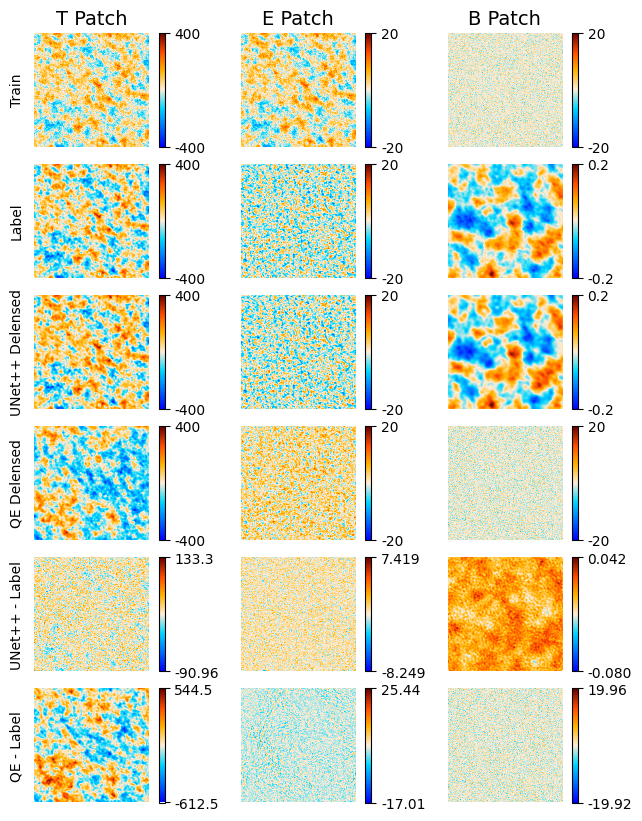

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pspy, pixell, os, sys
from pspy.so_config import DEFAULT_DATA_DIR
pixell.colorize.mpl_setdefault("planck")


num_map= 3
num_patch = 101


test_T = np.squeeze(np.load("results_TEB/T_test_epochs_5000.npy"))[num_patch]
test_E = np.squeeze(np.load("results_TEB/E_test_epochs_5000.npy"))[num_patch]
test_B = np.squeeze(np.load("results_TEB/B_test_epochs_5000.npy"))[num_patch]

label_T = np.squeeze(np.load("results_TEB/T_label_epochs_5000.npy"))[num_patch]
label_E = np.squeeze(np.load("results_TEB/E_label_epochs_5000.npy"))[num_patch]
label_B = np.squeeze(np.load("results_TEB/B_label_epochs_5000.npy"))[num_patch]

pred_T = np.squeeze(np.load("results_TEB/T_pred_epochs_5000.npy"))[num_patch]
pred_E = np.squeeze(np.load("results_TEB/E_pred_epochs_5000.npy"))[num_patch]
pred_B = np.squeeze(np.load("results_TEB/B_pred_epochs_5000.npy"))[num_patch]

QE_T = np.squeeze(np.load("results_QE/T_QE_maps.npy"))[num_patch]
QE_E = np.squeeze(np.load("results_QE/E_QE_maps.npy"))[num_patch]
QE_B = np.squeeze(np.load("results_QE/B_QE_maps.npy"))[num_patch]



def get_pref(A, B_min, B_max):
    A_min = A.min()
    A_max = A.max()
    scaled_A = (A - A.min()) * (B_max - B_min) / (A.max() - A.min()) + B_min
    return scaled_A


test_T = get_pref(test_T, -400, 400)
label_T = get_pref(label_T, -400, 400)
pred_T = get_pref(pred_T, -400, 400)
QE_T = get_pref(QE_T, -400, 400)

test_E = get_pref(test_T, -20, 20)
label_E = get_pref(label_E, -20, 20)
pred_E = get_pref(pred_E, -20, 20)
QE_E = get_pref(QE_E, -20, 20)

test_B = get_pref(test_B, -20, 20)
label_B = get_pref(label_B, -0.2, 0.2)
pred_B = get_pref(pred_B, -0.2, 0.2)
QE_B = get_pref(QE_B, -20, 20)


pred_T = pred_T #- np.abs((pred_T.min() - label_T.min()))/2
pred_E = pred_E #- np.abs((pred_Q.min() - label_Q.min()))/2
pred_B = pred_B #- np.abs((pred_U.min() - label_U.min()))/2

pred_label_T = (pred_T - label_T)
pred_label_E = (pred_E - label_E)
pred_label_B = (pred_B - label_B)

QE_label_T = QE_T - label_T
QE_label_E = (QE_E - label_E)
QE_label_B = QE_B - label_B


datas = [test_T,       test_E,        test_B,
        label_T,       label_E,       label_B,
        pred_T,        pred_E,        pred_B,
        QE_T,          QE_E,          QE_B,
        pred_label_T,  pred_label_E,  pred_label_B,
        QE_label_T,    QE_label_E,    QE_label_B]

titles = ['T Patch', 'E Patch', 'B Patch']


def fmt(x, pos):
    return "{:.4g}".format(x)

def fmt_b(x, pos):
    return "{:.3f}".format(x)

fig, axs = plt.subplots(6, 3, figsize=(8, 10))

for i, ax in enumerate(axs.flat):

    for spine in ax.spines.values():
        spine.set_visible(False)  
    if i%3 == 0:
        im = ax.imshow(datas[i])
    if i%3 == 1:
        im = ax.imshow(datas[i])
    if i%3 == 2:
        im = ax.imshow(datas[i])

    cbar = fig.colorbar(im, ax=ax, shrink=1.0)  
    cbar.set_ticks([datas[i].min(), datas[i].max()])

    if i == 13 or i == 14:
        cbar.formatter = FuncFormatter(fmt_b)
        cbar.update_ticks()
    else:
        cbar.formatter = FuncFormatter(fmt)
        cbar.update_ticks()


    if i < 3:
        ax.set_title(titles[i], fontsize=14)  

    if i == 0:
        ax.set_ylabel('Train', fontsize=10)
    elif i == 3:
        ax.set_ylabel('Label', fontsize=10)
    elif i == 6:
        ax.set_ylabel('UNet++ Delensed', fontsize=10)
    elif i == 9:
        ax.set_ylabel('QE Delensed', fontsize=10)
    elif i == 12:
        ax.set_ylabel('UNet++ - Label', fontsize=10)
    elif i == 15:
        ax.set_ylabel('QE - Label', fontsize=10)

    ax.set_xticks([])  
    ax.set_yticks([])  
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.15)
plt.savefig("figures/patch_results.pdf", format='pdf', bbox_inches='tight', pad_inches=0, dpi=100)
plt.show()



## plot pred dataset angular power spectrum

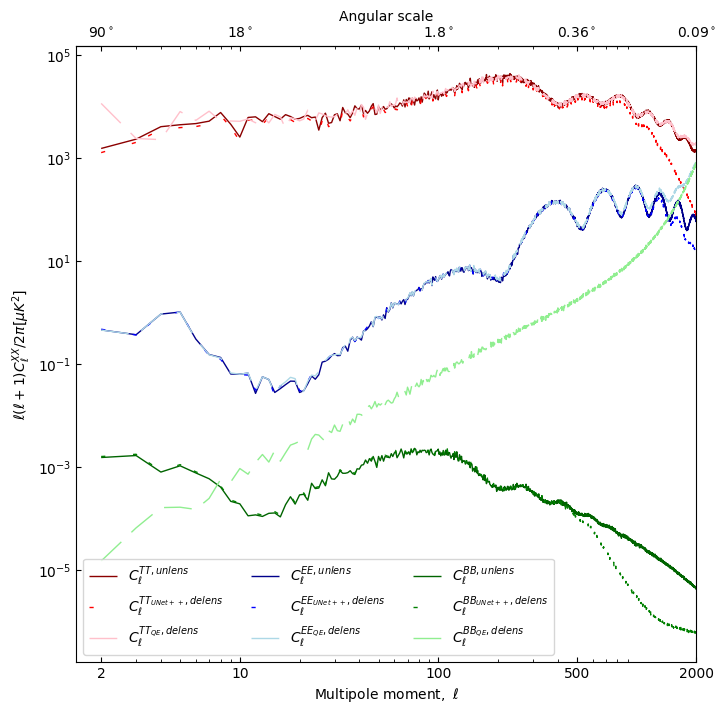

In [5]:
import os
import pylab as pl
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

def map2cl(mmap, lmax=2000):
    return hp.anafast(mmap, lmax=lmax)

rearr = np.load("rearr_data/rearr_nside2048.npy").astype("int")

num = 3
start = 192*num
end = 192*(num+1)


test_T = np.squeeze(np.load("results_TEB/T_test_epochs_5000.npy")).reshape(-1)[rearr]
test_E = np.squeeze(np.load("results_TEB/E_test_epochs_5000.npy")).reshape(-1)[rearr]
test_B = np.squeeze(np.load("results_TEB/B_test_epochs_5000.npy")).reshape(-1)[rearr]

label_T = np.squeeze(np.load("results_TEB/T_label_epochs_5000.npy")).reshape(-1)[rearr]
label_E = np.squeeze(np.load("results_TEB/E_label_epochs_5000.npy")).reshape(-1)[rearr]
label_B = np.squeeze(np.load("results_TEB/B_label_epochs_5000.npy")).reshape(-1)[rearr]/1000  ## During training, to prevent the loss function value from becoming too small, we amplified the output of the B-mode by a factor of 1000.

pred_T = np.squeeze(np.load("results_TEB/T_pred_epochs_5000.npy")).reshape(-1)[rearr]
pred_E = np.squeeze(np.load("results_TEB/E_pred_epochs_5000.npy")).reshape(-1)[rearr]
pred_B = np.squeeze(np.load("results_TEB/B_pred_epochs_5000.npy")).reshape(-1)[rearr]

QE_T = np.squeeze(np.load("results_QE/T_QE_maps.npy")).reshape(-1)[rearr]
QE_E = np.squeeze(np.load("results_QE/E_QE_maps.npy")).reshape(-1)[rearr]
QE_B = np.squeeze(np.load("results_QE/B_QE_maps.npy")).reshape(-1)[rearr]

test_T_cl = map2cl(test_T)
label_T_cl = map2cl(label_T)
pred_T_cl = map2cl(pred_T)
QE_T_cl = map2cl(QE_T)

test_E_cl = map2cl(test_E)/1e3
label_E_cl = map2cl(label_E)
pred_E_cl = map2cl(pred_E)
QE_E_cl = map2cl(QE_E)

test_B_cl = map2cl(test_B)
label_B_cl = map2cl(label_B)
pred_B_cl = map2cl(pred_B)
QE_B_cl = map2cl(QE_B)


ell = np.arange(len(test_T_cl))[2:]
factor = ell*(ell+1)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(1, 1, 1)
solid = (0, ())
dash1 = (0, (20, 10))
dot_dash = (0, (3, 20, 3, 10))
short_dash = (0, (20, 20))

linewidth = 1
ax1.loglog(ell, factor*label_T_cl[2:], label=r"$C_\ell^{TT, unlens}$", c='darkred', linestyle=solid, linewidth=linewidth)
ax1.loglog(ell, factor*pred_T_cl[2:], label=r"$C_\ell^{TT_{UNet++}, delens}$", c='red', linestyle=dot_dash, linewidth=linewidth)
ax1.loglog(ell, factor*QE_T_cl[2:], label=r"$C_\ell^{TT_{QE}, delens}$", c='pink', linestyle=dash1, linewidth=linewidth)

# E-E plots
ax1.loglog(ell, factor*label_E_cl[2:], label=r"$C_\ell^{EE, unlens}$", c='darkblue', linestyle=solid, linewidth=linewidth)
ax1.loglog(ell, factor*pred_E_cl[2:], label=r"$C_\ell^{EE_{UNet++}, delens}$", c='blue', linestyle=dot_dash, linewidth=linewidth)
ax1.loglog(ell, factor*QE_E_cl[2:], label=r"$C_\ell^{EE_{QE}, delens}$", c='lightblue', linestyle=dash1, linewidth=linewidth)

# B-B plots
ax1.loglog(ell, factor*label_B_cl[2:], label=r"$C_\ell^{BB, unlens}$", c='darkgreen', linestyle=solid, linewidth=linewidth)
ax1.loglog(ell, factor*pred_B_cl[2:], label=r"$C_\ell^{BB_{UNet++}, delens}$", c='green', linestyle=dot_dash, linewidth=linewidth)
ax1.loglog(ell, factor*QE_B_cl[2:], label=r"$C_\ell^{BB_{QE}, delens}$", c='lightgreen', linestyle=dash1, linewidth=linewidth)



ax1.set_xlim(1.5, 2000)
ax1.set_xticks([2, 10, 100, 500, 2000])
ax1.set_xticklabels(['2', '10', '100', '500', '2000'])
ax1.set_ylabel(r"$\ell(\ell+1)C^{XX}_\ell/2\pi[\mu K^2]$")
ax1.legend(loc='best', ncol=3)
ax1.set_xlabel(r"$\rm{Multipole~moment,}~\ell$")


ax_top = ax1.twiny()
ax_top.spines.top.set_position(("axes", 1))
ax_top.set_xscale("log")
ax_top.set_xlim(1.5, 2000)
ax_top.set_xticks([2, 10, 100, 500, 2000])
ax_top.set_xticklabels([r'$90^\circ$', r'$18^\circ$', r'$1.8^\circ$', r'$0.36^\circ$', r'$0.09^\circ$'])
ax_top.set_xlabel("Angular scale")
ax_top.spines['left'].set_visible(False)
ax_top.spines['bottom'].set_visible(False)
ax_top.spines['right'].set_visible(False)

for ax in fig.get_axes():
    ax.label_outer()
plt.savefig("figures/result_cls_single.pdf", bbox_inches='tight', pad_inches=0, dpi=100, format='pdf')
plt.show()

## rotate the map by ra, dec. By first rotating and then segmenting the sky map, repeating this operation and training process multiple times, and finally averaging the prediction results of the network training, it is possible to effectively reduce the error caused by segmentation.

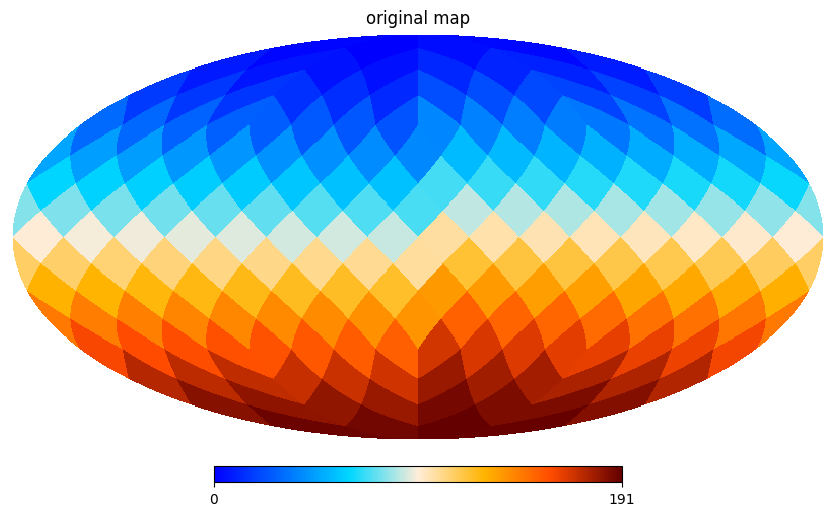

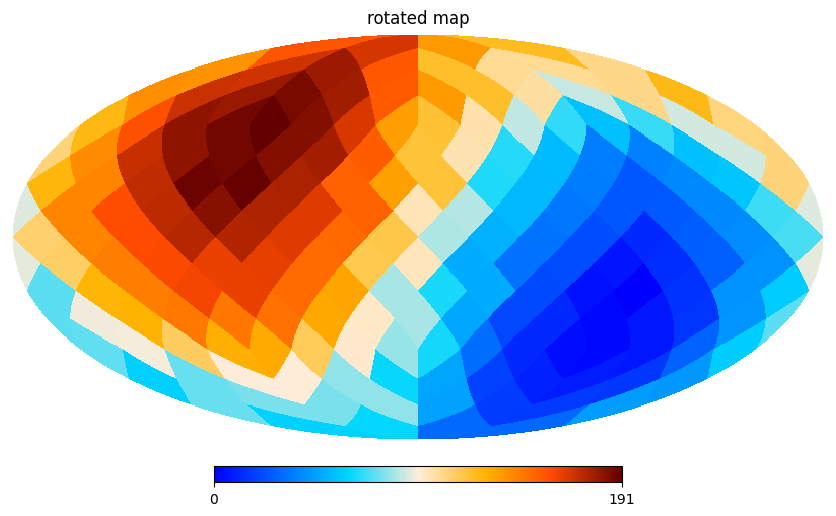

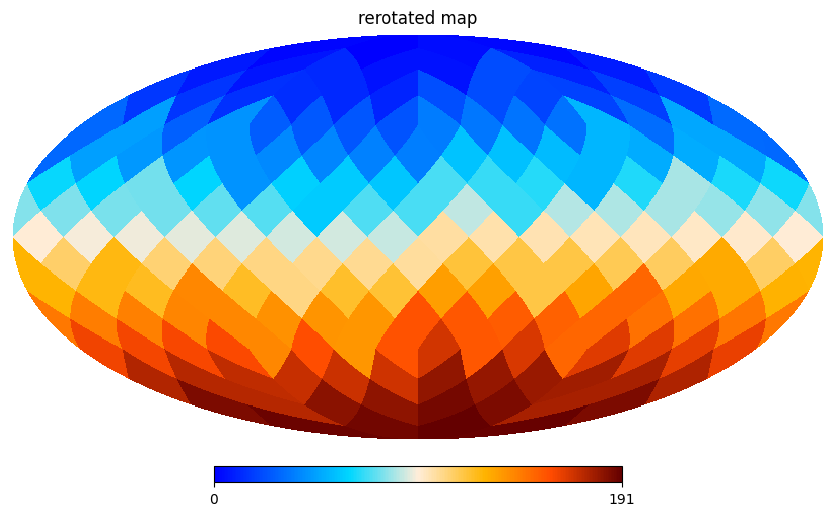

In [4]:
import numpy as np
import healpy as hp
from healpy.rotator import Rotator
import matplotlib.pyplot as plt

import pspy, pixell, os, sys
from pspy.so_config import DEFAULT_DATA_DIR
pixell.colorize.mpl_setdefault("planck")

def rotate_map(mmap, ra, dec, nside):
    theta, phi = hp.pix2ang(nside, np.arange(len(mmap)))
    rot = Rotator(deg=True, rot=[ra, dec])
    rot_theta, rot_phi = rot(theta, phi)
    rot_index = hp.ang2pix(nside, rot_theta, rot_phi)
    rot_map = mmap[rot_index]
    return rot_map

def rotate_back(rot_map, ra, dec, nside):
    theta, phi = hp.pix2ang(nside, np.arange(len(rot_map)))
    inv_rot = Rotator(deg=True, rot=[ra, dec], inv=True)
    orig_theta, orig_phi = inv_rot(theta, phi)
    orig_index = hp.ang2pix(nside, orig_theta, orig_phi)
    recovered_map = rot_map[orig_index]
    return recovered_map


nside = 4
mmap = np.arange(hp.nside2npix(nside))
rot_map = rotate_map(mmap, 90, 120, nside)
rerot_map = rotate_back(rot_map, 90, 120, nside)

hp.mollview(mmap, norm='hist', title='original map')
plt.savefig('figures/original.png')
hp.mollview(rot_map, norm='hist', title='rotated map')
plt.savefig('figures/rotated.png')
hp.mollview(rerot_map, norm='hist', title='rerotated map')
plt.savefig('figures/rerotated.png')
plt.show()